In [61]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
filepath = "../results/results_emission.csv"
data2 = pd.read_csv(filepath, sep=",", names=["vehicle_fuel", "vehicle_speed", "vehicle_noise", "vehicle_NOx", "prediction"])
data2.head(10)

,vehicle_fuel,vehicle_speed,vehicle_noise,vehicle_NOx,prediction
0,0.00,12.35,62.81,0.03,0.020150
1,0.00,10.51,61.01,0.00,0.011286
2,0.00,15.22,64.70,0.00,0.138177
3,813.11,13.70,64.59,0.81,0.875769
4,467.40,13.11,63.48,0.31,0.408274
5,1628.30,12.98,66.34,2.03,2.141641
6,668.70,11.74,62.97,0.64,0.616425
7,1184.63,12.79,64.98,1.38,1.436401
8,0.00,10.21,61.12,0.00,0.099250
9,1017.73,15.39,65.99,1.07,1.200910


In [63]:
filepath = "../results/results_fcd.csv"
data1 = pd.read_csv(filepath, sep=",", names=["vehicle_x", "vehicle_y", "congestion_cluster"])

In [64]:
import pandas as pd

x1 = 0.26
y1 = 14.01
lat1 = 59.321926
lon1 = 18.067417

x2 = 116.30
y2 = 109.42
lat2 = 59.322828
lon2 = 18.069380

vehicle_x = data1["vehicle_x"]  
vehicle_y = data1["vehicle_y"] 

scale_factor_x = (lon2 - lon1) / (x2 - x1)
scale_factor_y = (lat2 - lat1) / (y2 - y1)

data1["lat"] = lat1 + (vehicle_y - y1) * scale_factor_y
data1["lon"] = lon1 + (vehicle_x - x1) * scale_factor_x

print(data1)

     vehicle_x  vehicle_y  congestion_cluster        lat        lon
0       471.67     265.37                   4  59.324302  18.075392
1       481.76     348.92                   1  59.325092  18.075562
2       479.59     380.70                   1  59.325393  18.075526
3       475.54     402.96                   1  59.325603  18.075457
4       454.94     450.10                   3  59.326049  18.075109
..         ...        ...                 ...        ...        ...
118     426.20      95.80                   2  59.322699  18.074622
119     407.45      52.90                   2  59.322294  18.074305
120     419.78      80.90                   2  59.322558  18.074514
121     413.47      66.38                   2  59.322421  18.074407
122     407.07      52.05                   2  59.322286  18.074299

[123 rows x 5 columns]


In [65]:
data1 = gpd.GeoDataFrame(data1, geometry=gpd.points_from_xy(data1["lat"], data1["lon"]))
data1.head(10)

,vehicle_x,vehicle_y,congestion_cluster,lat,lon,geometry
0,471.67,265.37,4,59.324302,18.075392,POINT (59.32430 18.07539)
1,481.76,348.92,1,59.325092,18.075562,POINT (59.32509 18.07556)
2,479.59,380.70,1,59.325393,18.075526,POINT (59.32539 18.07553)
3,475.54,402.96,1,59.325603,18.075457,POINT (59.32560 18.07546)
4,454.94,450.10,3,59.326049,18.075109,POINT (59.32605 18.07511)
5,420.17,81.80,2,59.322567,18.074520,POINT (59.32257 18.07452)
6,460.95,218.62,4,59.323860,18.075210,POINT (59.32386 18.07521)
7,468.33,250.35,4,59.324160,18.075335,POINT (59.32416 18.07534)
8,482.04,334.97,1,59.324960,18.075567,POINT (59.32496 18.07557)
9,480.57,367.23,1,59.325265,18.075542,POINT (59.32527 18.07554)


In [66]:
clusters = data1["congestion_cluster"].unique()
clusters

array([4, 1, 3, 2], dtype=int64)

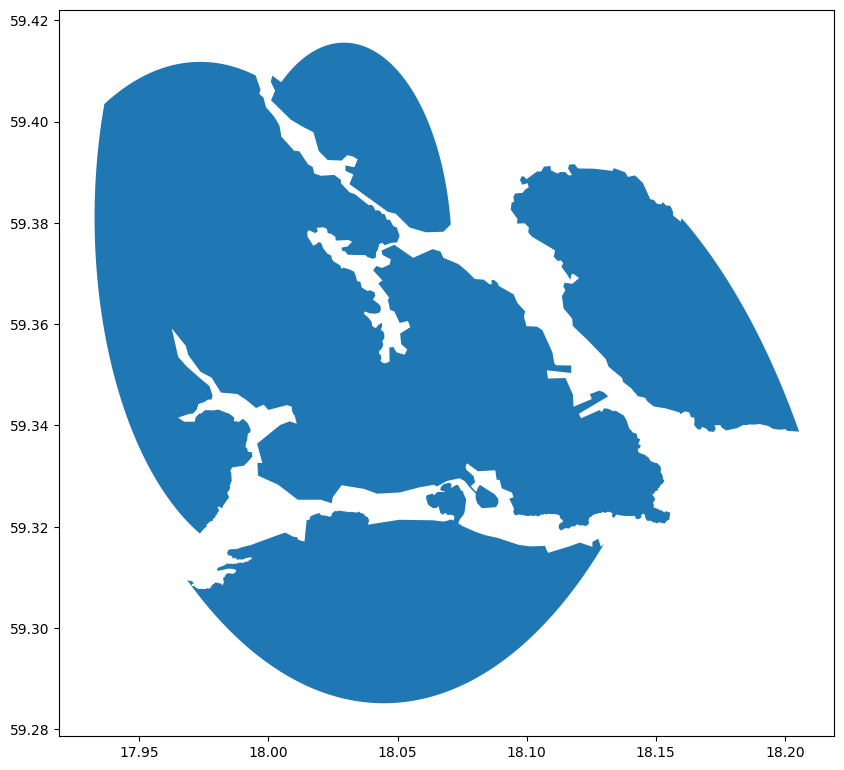

In [67]:
world = gpd.read_file('./stockholm.geojson')
world.head(10)
world.plot(figsize=(10, 10))
plt.show()

In [58]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[59.3293, 18.0686], zoom_start=12)

color_map = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'purple'
}

marker_cluster = MarkerCluster().add_to(m)

for index, row in data1.iterrows():
    folium.Marker(location=[row["lat"], row["lon"]], popup="Cluster", 
                  icon=folium.Icon(color=color_map.get(row["congestion_cluster"], 'gray'))).add_to(marker_cluster)

m
